In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import gaussian_kde

In [2]:
#https://en.wikipedia.org/wiki/ISO_3166-2:CH ; use wiki to find other areas
#other areas might use other nodes as table_tennis
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area["ISO3166-2"="CH-ZH"];
(nwr["sport"="table_tennis"](area);
);
out center;
"""

response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

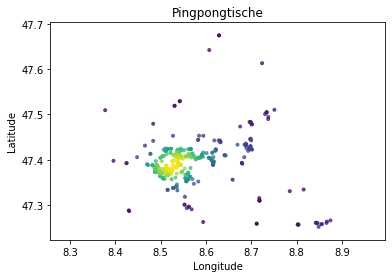

In [4]:
# Collect coords into list
coords = []
for element in data['elements']:
    if element['type'] == 'node':
        lon = element['lon']
        lat = element['lat']
        coords.append((lon, lat))
    elif 'center' in element:
        lon = element['center']['lon']
        lat = element['center']['lat']
        coords.append((lon, lat))
# Convert coordinates into numpy array
X = np.array(coords)

# 'admin_level' connects to indices
a=X[:, 0]
b=X[:, 1]

# Calculate the point density
xy = np.vstack([a,b])
z = gaussian_kde(xy)(xy)
    
# Sort the points by density, so that the densest points are plotted last
idxx = z.argsort()
a, b, z = a[idxx], b[idxx], z[idxx]

#test plot
plt.scatter(a, b, c=z, s=9, alpha=.7)
plt.title('Pingpongtische')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

In [5]:
#Source: https://towardsdatascience.com/exploring-and-visualizing-chicago-transit-data-using-pandas-and-bokeh-part-ii-intro-to-bokeh-5dca6c5ced10
def merclon(b,a):  
    lat = b
    lon = a
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)  
    return (x)

def merclat(b,a):
    lat = b
    lon = a
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + 
        lat * (np.pi/180.0)/2.0)) * scale     
    return (y)

coords_x = merclon(b,a)
coords_y = merclat(b,a)



In [6]:
#USING TILE
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import get_provider, Vendors

tile_provider = get_provider(Vendors.CARTODBPOSITRON)

# range bounds supplied in web mercator coordinates
p = figure(x_range=(945000, 961000), y_range=(5992000, 6004000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(tile_provider)

p.circle(x=coords_x, y=coords_y, size=10,fill_alpha=0.5)

p.sizing_mode='scale_width'

output_notebook()
show(p)

Loading BokehJS ...